In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

### Fig 1 for SPY

In [3]:
DATA_DIR = "../data/snp_new"
RETURNS_PATH = os.path.join(DATA_DIR, "returns_1d.parquet")
PRICES_PATH = os.path.join(DATA_DIR, "prices_1d.parquet")
VOLA_PATH = os.path.join(DATA_DIR, "vola_1d.parquet")
SP500_PATH = os.path.join(DATA_DIR, "prices_sp500_1d.parquet")

df_ret = pd.read_parquet(RETURNS_PATH)
df_prices = pd.read_parquet(PRICES_PATH)
df_vol = pd.read_parquet(VOLA_PATH)
df_sp500 = pd.read_parquet(SP500_PATH)

# Ensure datetime index
df_ret.index = pd.to_datetime(df_ret.index)
df_prices.index = pd.to_datetime(df_prices.index)
df_vol.index = pd.to_datetime(df_vol.index)
df_sp500.index = pd.to_datetime(df_sp500.index)

# Evaluation period
start_date = pd.to_datetime("2006-01-01")
end_date = pd.to_datetime("2021-12-31")

# Slice data according to the evaluation period
df_prices = df_prices.loc[start_date:end_date].copy()
df_ret = df_ret.loc[start_date:end_date].copy()
df_vol = df_vol.loc[start_date:end_date].copy()
df_sp500 = df_sp500.loc[start_date:end_date].copy()

print("Data loaded successfully:")
print(f"Returns: {df_ret.shape}, {df_ret.index.min()} to {df_ret.index.max()}")
print(f"Prices: {df_prices.shape}, {df_prices.index.min()} to {df_prices.index.max()}")
print(f"Volatility: {df_vol.shape}, {df_vol.index.min()} to {df_vol.index.max()}")
print(f"SP500: {df_sp500.shape}, {df_sp500.index.min()} to {df_sp500.index.max()}")

Data loaded successfully:
Returns: (4027, 11), 2006-01-03 00:00:00 to 2021-12-30 00:00:00
Prices: (4027, 11), 2006-01-03 00:00:00 to 2021-12-30 00:00:00
Volatility: (4027, 3), 2006-01-03 00:00:00 to 2021-12-30 00:00:00
SP500: (4027, 1), 2006-01-03 00:00:00 to 2021-12-30 00:00:00


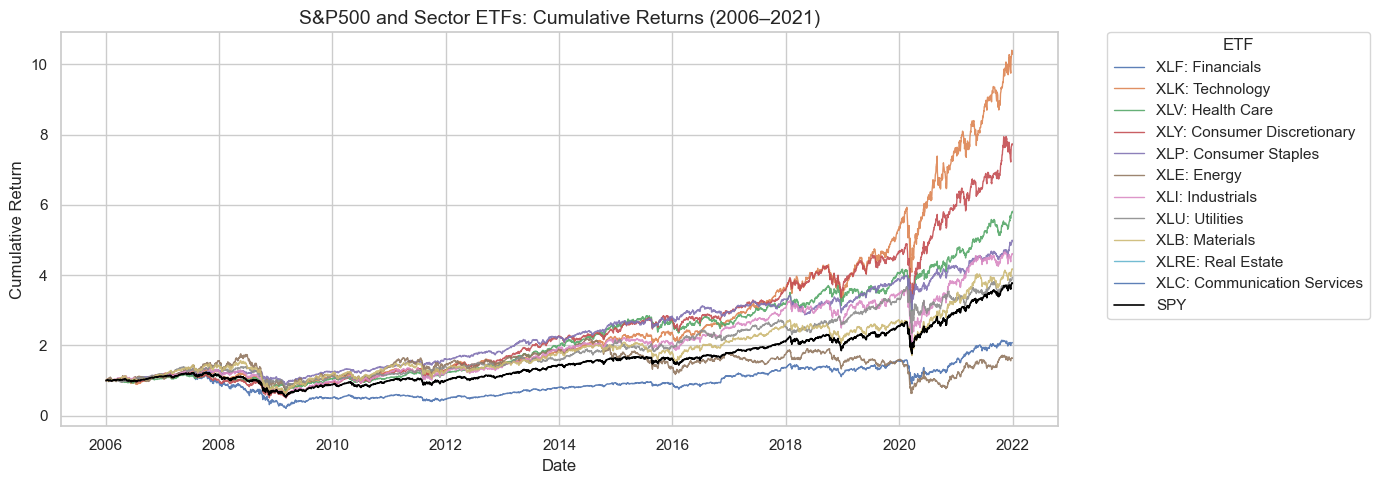

: 

In [ ]:
# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =
# replicate fig 1 SPY cumulative returns vs sector ETFs
# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Get SPY price series
spy_prices = df_sp500["^GSPC"]

spy_cum_ret = spy_prices / spy_prices.iloc[0]
sector_etfs_cum_ret = df_prices / df_prices.iloc[0]

sector_etf_names = {
    "XLF": "Financials",
    "XLK": "Technology",
    "XLV": "Health Care",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLI": "Industrials",
    "XLU": "Utilities",
    "XLB": "Materials",
    "XLRE": "Real Estate",
    "XLC": "Communication Services"
}

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 5))

# Plot each sector ETF (thin lines, partial transparency)
for col in sector_etfs_cum_ret.columns:
    sns.lineplot(
        x=sector_etfs_cum_ret.index,
        y=sector_etfs_cum_ret[col],
        label=f"{col}: {sector_etf_names[col]}",
        linewidth=1,
        alpha=0.9
    )

# Plot SPY on top (thicker black line)
sns.lineplot(
    x=spy_cum_ret.index,
    y=spy_cum_ret,
    label="SPY",
    color='black',
    linewidth=1.2
)

# Formatting
plt.title("S&P500 and Sector ETFs: Cumulative Returns (2006–2021)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.legend(title="ETF", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.savefig("../plots/spy_cum_ret.pdf", format="pdf", dpi=300)

plt.show()

### Fig 1 for MSCI

In [ ]:
# do the same for MSCI World ETF